In [2]:
library(dplyr)
library(ggplot2)

In [3]:
data = read.table("dataset/enade.txt",sep=";", dec = ",", header = TRUE)
head(data)

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
3,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
4,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,5,6,6,6,6,4
5,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
6,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,5,6,6,6,6,6,6,6,5


In [14]:
df = data[data$CO_GRUPO == 13,]

In [15]:
dim(df)

[1] 9582  137

In [16]:
df$ufpr = as.factor(ifelse(df$CO_IES == 571,1,0))

## Variáveis de IES

In [17]:
# Metodologia = QE_I30
# Ensino = QE_I39
# Coordenação = QE_I41
# Extensão = QE_I43
# Estrutura_salas = QE_I61 

In [20]:
df_1 = df %>% 
        select(NT_GER, CO_IES, ufpr, TP_SEXO, NU_IDADE,QE_I02, QE_I08, QE_I21, QE_I10,QE_I23,
              QE_I30, QE_I39, QE_I41, QE_I43, QE_I61) %>% 
        setNames(c("nota", "IES", "ufpr", "genero", "idade","cor", "renda", "escolaridade_pais","trabalho", "esforco",
                  "metodologia", "ensino", "coordenacao", "extensao", "estrutura"))

In [12]:
df_1$metodologia = as.factor(df_1$metodologia)
df_1$ensino = as.factor(df_1$ensino)
df_1$coordenacao = as.factor(df_1$coordenacao)
df_1$extensao = as.factor(df_1$extensao)
df_1$estrutura = as.factor(df_1$estrutura)

In [23]:
df_1$IES = as.factor(df_1$IES)

In [24]:
head(df_1)

,nota,IES,ufpr,genero,idade,cor,renda,escolaridade_pais,trabalho,esforco,metodologia,ensino,coordenacao,extensao,estrutura
,<dbl>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>
161,24.9,1780,0,F,28,A,C,B,E,C,6,6,6,6,6
162,25.6,1780,0,M,30,A,D,A,E,B,6,6,6,6,6
163,48.7,1780,0,M,29,A,C,B,E,C,6,6,6,6,6
164,35.7,1780,0,F,22,A,B,A,E,B,6,6,6,6,6
165,33.9,1780,0,M,47,A,B,A,E,C,6,6,6,6,6
166,23.5,1780,0,M,27,A,C,B,E,C,6,6,6,6,6


Warning message:
"Groups with fewer than two data points have been dropped."
Warning message in max(ids, na.rm = TRUE):
"nenhum argumento não faltante para max; retornando -Inf"


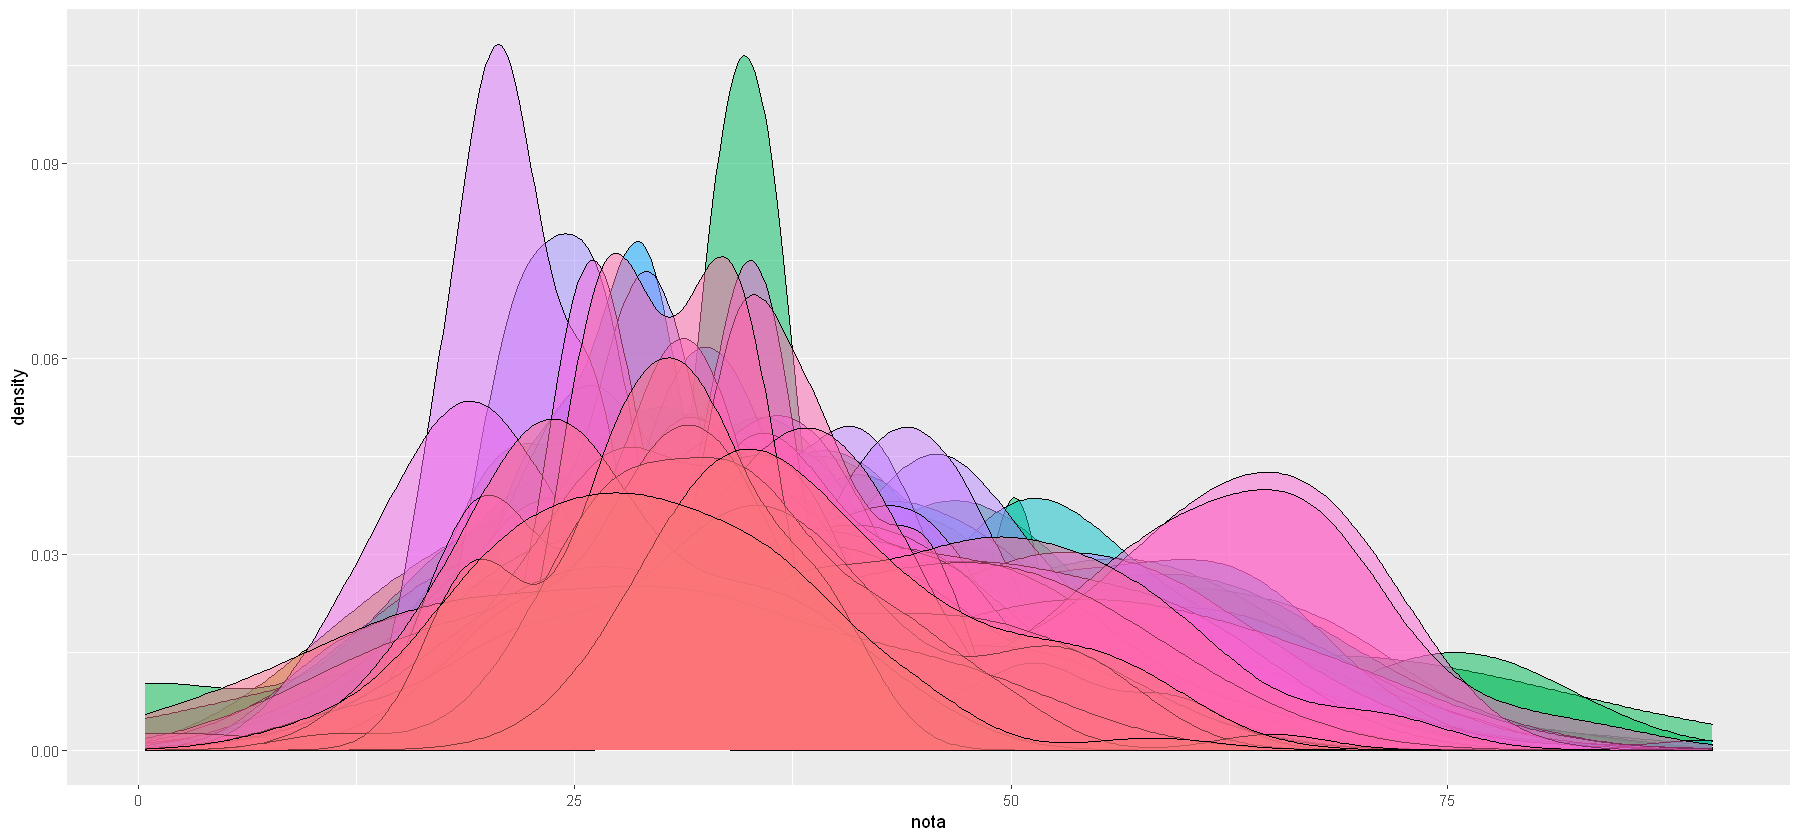

In [50]:
options(repr.plot.width = 15, repr.plot.height = 7)

df_1%>%subset(nota>0)%>% 
  ggplot(aes(x = nota)) +
  geom_density(aes(fill = IES),
               # adicionar transparencia
               alpha = 0.5) + 
guides(fill=FALSE)

In [46]:
df_1[df_1$nota>0,][1].values

ERROR: Error in parse(text = x, srcfile = src): <text>:1:22: unexpected symbol
1: df_1[df_1$nota>0,][1].values
                         ^


In [ ]:
df

,nota,IES,ufpr,genero,idade,cor,renda,escolaridade_pais,trabalho,esforco,metodologia,ensino,coordenacao,extensao,estrutura
,<dbl>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>
161,24.9,1780,0,F,28,A,C,B,E,C,6,6,6,6,6
162,25.6,1780,0,M,30,A,D,A,E,B,6,6,6,6,6
163,48.7,1780,0,M,29,A,C,B,E,C,6,6,6,6,6
164,35.7,1780,0,F,22,A,B,A,E,B,6,6,6,6,6
165,33.9,1780,0,M,47,A,B,A,E,C,6,6,6,6,6
166,23.5,1780,0,M,27,A,C,B,E,C,6,6,6,6,6
167,32.2,1780,0,F,23,A,B,B,A,E,6,6,6,6,6
168,20.9,1780,0,F,48,A,C,A,E,C,6,6,6,6,6
169,48.9,1780,0,M,23,A,D,A,C,E,6,6,6,6,6
